<a href="https://colab.research.google.com/github/Swatijoshi2002/scikitlearn_machinelearning/blob/main/housepricepredictionprojet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U scikit-learn

In [46]:
import numpy as np #used for making arrays
import pandas as pd #used for making dataframe 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors,metrics

In [6]:
from google.colab import files
uploaded=files.upload()

Saving house-prices.csv to house-prices.csv


In [7]:
import io
data=pd.read_csv(io.BytesIO(uploaded['house-prices.csv']))

In [18]:
print(data.head)
print(data.shape)

<bound method NDFrame.head of      Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0       1  114300  1790         2          2       2    No         East
1       2  114200  2030         4          2       3    No         East
2       3  114800  1740         3          2       1    No         East
3       4   94700  1980         3          2       3    No         East
4       5  119800  2130         3          3       3    No         East
..    ...     ...   ...       ...        ...     ...   ...          ...
123   124  119700  1900         3          3       3   Yes         East
124   125  147900  2160         4          3       3   Yes         East
125   126  113500  2070         2          2       2    No        North
126   127  149900  2020         3          3       1    No         West
127   128  124600  2250         3          3       4    No        North

[128 rows x 8 columns]>
(128, 8)


In [8]:
data.describe()


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [11]:
correlation=data.corr()


constructing heatmap for correlation

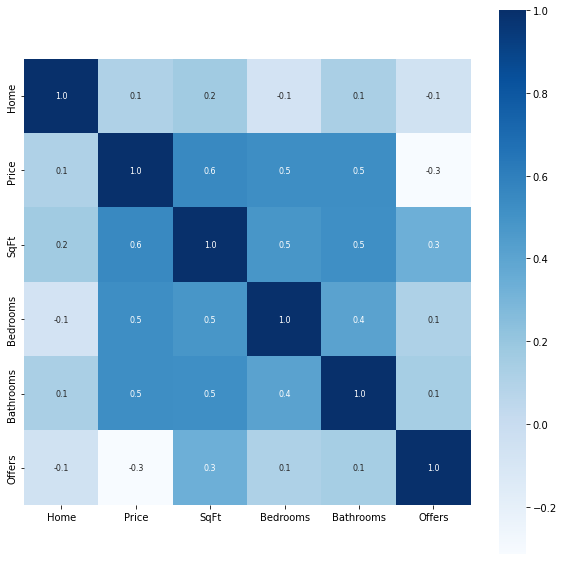

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [119]:
x=data.drop(['Price','Neighborhood'],axis=1) 
y=data['Price']

In [76]:
data.Brick[data.Brick=='Yes']=1
data.Brick[data.Brick=='No']=0
print(data['Brick'])

0      0
1      0
2      0
3      0
4      0
      ..
123    1
124    1
125    0
126    0
127    0
Name: Brick, Length: 128, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
data.Neighborhood[data.Neighborhood=='North']=1
data.Neighborhood[data.Neighborhood=='South']=2
data.Neighborhood[data.Neighborhood=='East']=3
data.Neighborhood[data.Neighborhood=='West']=4
print(data['Neighborhood'])

0      2
1      2
2      2
3      2
4      2
      ..
123    2
124    2
125    4
126    1
127    4
Name: Neighborhood, Length: 128, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [122]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2) #training datais 80%  and test data=20%
print(x.shape,X_train.shape,X_test.shape)
 

(128, 6) (102, 6) (26, 6)


In [123]:
#loading model
model=XGBRegressor()
model.fit(X_train,Y_train)

[17:05:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [97]:
prediction=model.predict(X_train)
print(prediction)

[125036.11  103545.31  114355.75  134246.62  176776.3   169474.06
  98868.86  184234.42  106893.09  143164.19  135796.58  101260.914
 126073.9   102293.625 136740.84  100319.125 183489.9   144820.9
 111284.766 167904.12  126333.1   120033.55  166804.95  127585.445
 146578.42  133036.84  113438.76   92904.87  115273.72  110883.62
 161118.42  158791.77  138687.42  146541.11  132927.03   85944.914
 105292.27  172779.52  118470.01  125021.87  133311.92  131203.4
 134730.8   141085.03  145770.72  161789.95  152116.98  118385.19
  94667.26  119835.42  148403.86  116945.76  124976.28  145747.72
 105959.34  198282.3   144278.14  110421.53  203560.83  141776.4
 121066.77  117037.84  145918.94  125755.4   111541.516 147454.36
 156530.38  124479.734 102921.15  131419.89  160199.58  146854.17
 138937.89  142351.42  131071.69   97696.016 106407.96  118566.
 135627.8   150218.86  110280.55  146376.14  111970.15  139376.03
 123456.98  121937.82   91235.32  185476.55  111970.77  148137.38
 108539.69  

In [110]:

#r square error
error1=metrics.r2_score(Y_train,prediction)
print("r2 error==>",error1) #gives the error made by our model


r2 error==> 0.9661213103931697


ValueError: ignored

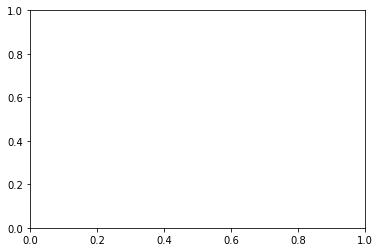

In [124]:
plt.scatter(Y_train,prediction)
plt.xlabel('actualprice')
plt.ylabel('predictedprice')
plt.title('actual and predicted price graph')

In [113]:
prediction_t=model.predict(X_test)
print(prediction_t)
errort=metrics.r2_score(Y_test,prediction_t)
print("r2 error==>",errort) #gives the error made by our model


[130777.41  109232.96   86677.664 103842.055 161245.84  179222.47
 111868.3    96465.75  153706.08  170057.3   131346.55  122413.664
  92804.85  115531.99  129855.97  140925.12  114094.195 119481.52
 107010.055 137541.44  111886.21  148735.25  132268.23  118353.51
 140838.05  112011.74 ]
r2 error==> 0.6652499280501702


Text(0.5, 1.0, 'actual and predicted price graph')

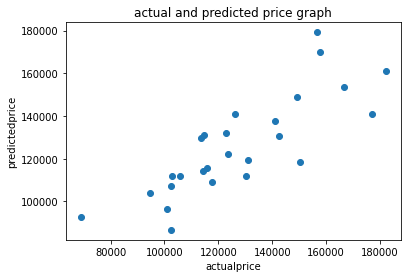

In [126]:
plt.scatter(Y_test,prediction_t)
plt.xlabel('actualprice')
plt.ylabel('predictedprice')
plt.title('actual and predicted price graph')